Processing subject: 08434


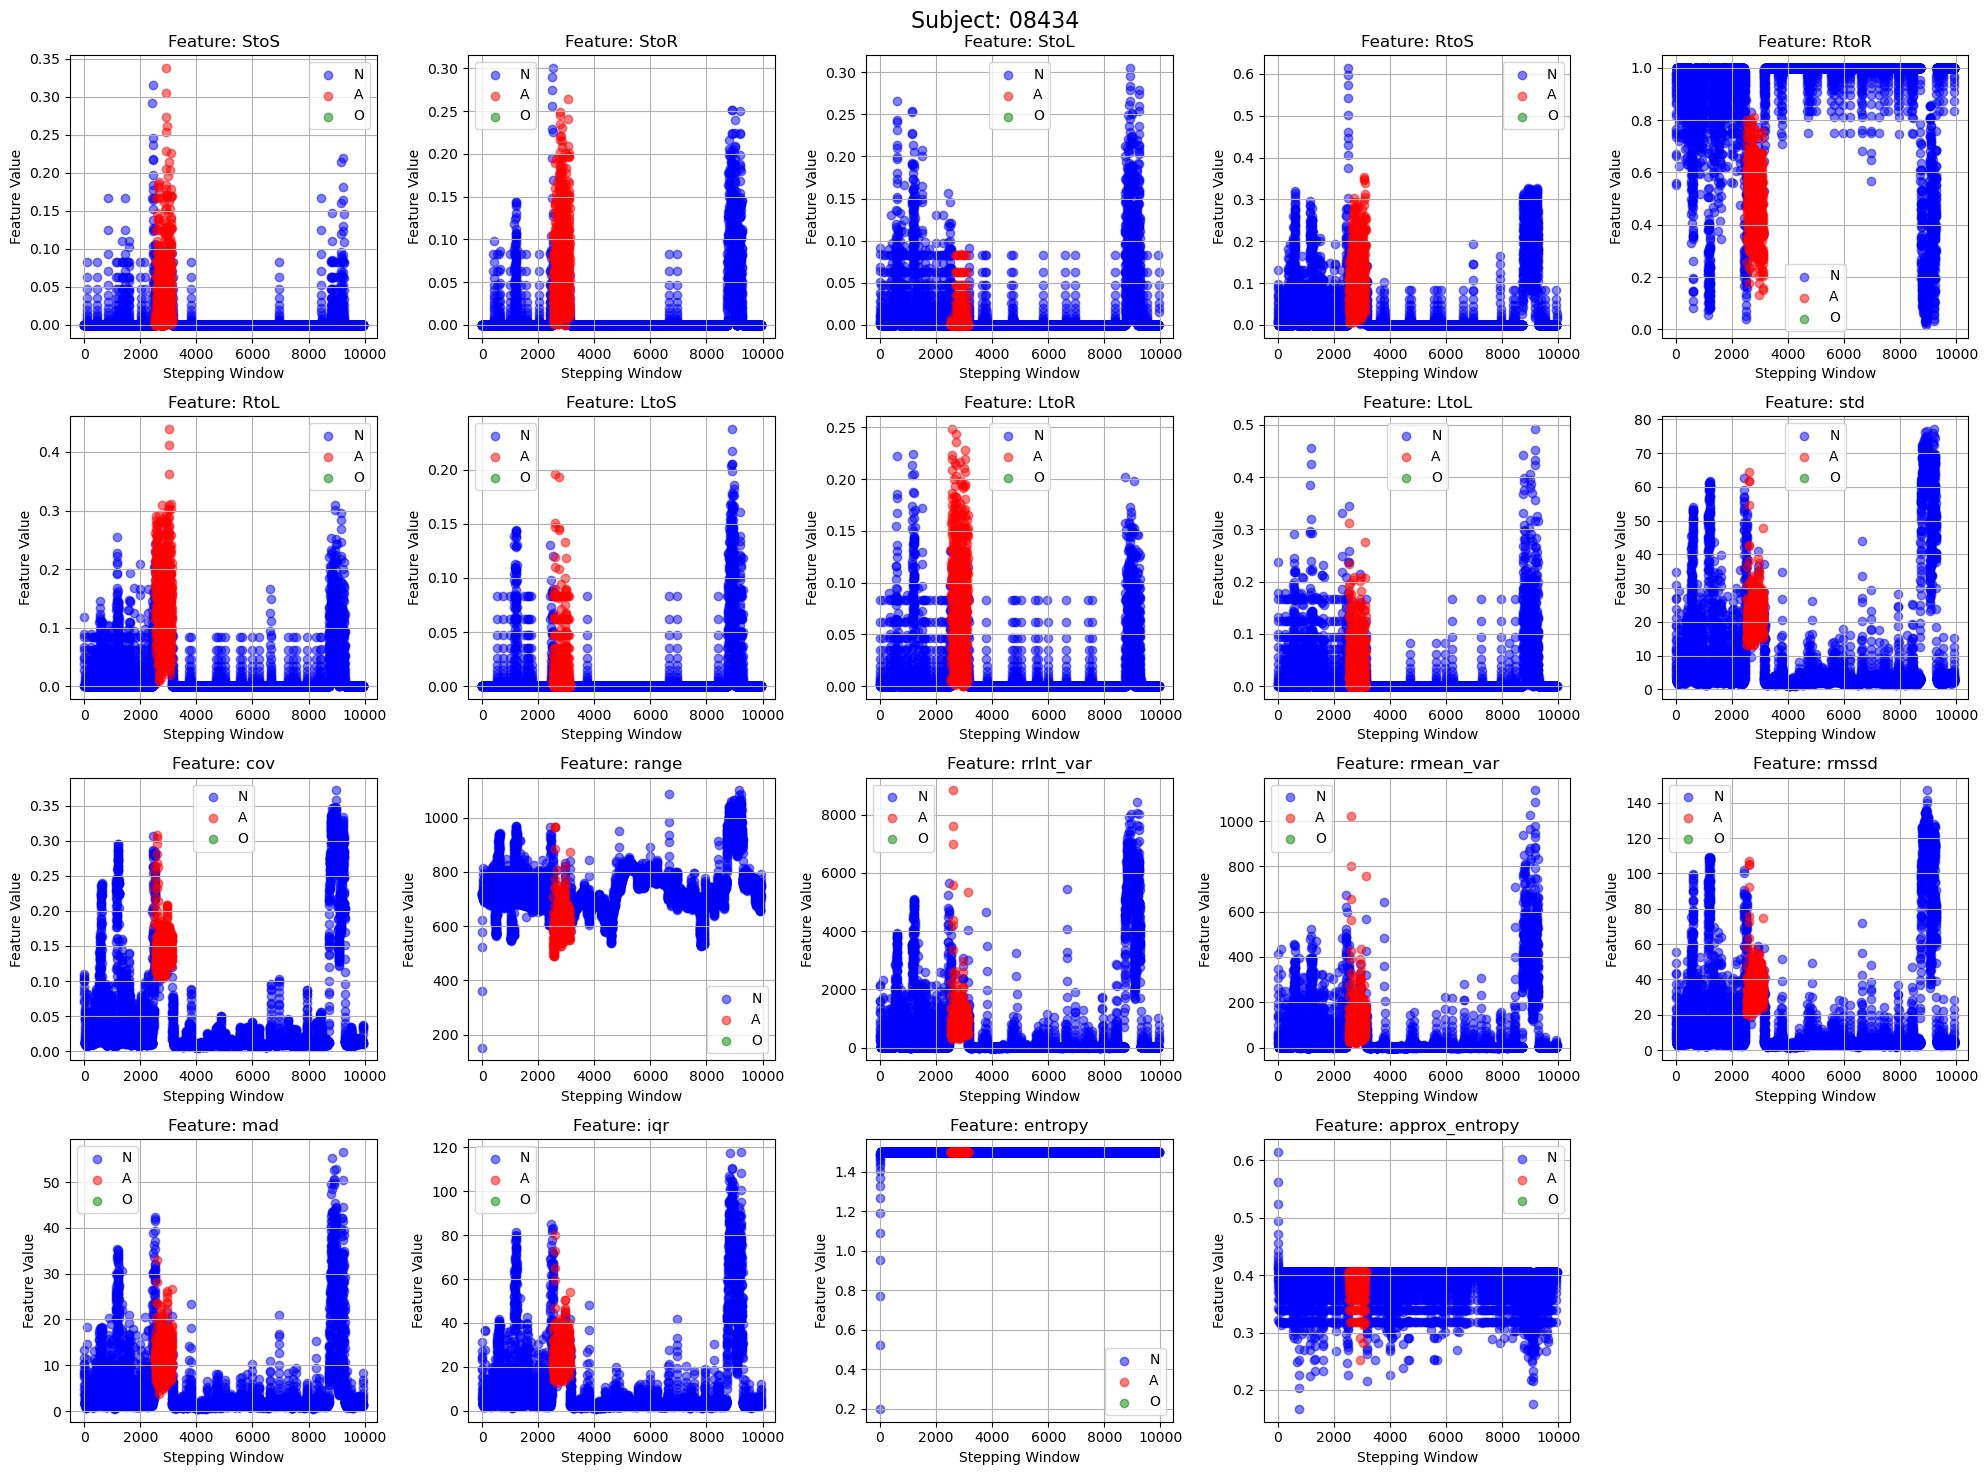

KeyboardInterrupt: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages

def plot_features_from_dataframe(df, subject_id, pdf_pages):
    features_to_plot = [
        'StoS', 'StoR', 'StoL', 'RtoS', 'RtoR', 'RtoL', 'LtoS', 'LtoR', 'LtoL', 
        'std', 'cov', 'range', 'rrInt_var', 'rmean_var', 'rmssd', 'mad', 'iqr', 
        'entropy', 'approx_entropy'
    ]
    
    rhythm_colors = {
        "N": "blue",
        "A": "red",
        "O": "green"
    }


    window_rhythms = df['rhythmLabel'].tolist()


    nrows = 4
    ncols = 5

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
    fig.suptitle(f'Subject: {subject_id}', fontsize=16)

    for idx, feature in enumerate(features_to_plot):
        ax = axes[idx // ncols, idx % ncols]
        for rhythm, color in rhythm_colors.items():
            indices = [i for i, r in enumerate(window_rhythms) if r == rhythm]
            ax.scatter(indices, df[feature].iloc[indices], color=color, label=f"{rhythm}", alpha=0.5)
        
        ax.set_xlabel('Stepping Window')
        ax.set_ylabel('Feature Value')
        ax.set_title(f'Feature: {feature}')
        ax.legend()
        ax.grid(True)


    for idx in range(len(features_to_plot), nrows * ncols):
        fig.delaxes(axes.flatten()[idx])

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    pdf_pages.savefig(fig) 
    plt.close(fig) 

feature_directory = "/Users/taran/Documents/GitHub/2022-svsm-afib-group1/mit-bih-time-features-stepping"
pdf_filename = "/Users/taran/Documents/GitHub/2022-svsm-afib-group1/testfeatures1_plots_grid.pdf"


with PdfPages(pdf_filename) as pdf_pages:
    for filename in os.listdir(feature_directory):
        if filename.endswith(".parquet"):
            subject_id = filename.split(".")[0]
            print(f"Processing subject: {subject_id}")
            try:
                df = pd.read_parquet(os.path.join(feature_directory, filename))
                plot_features_from_dataframe(df, subject_id, pdf_pages)
            except Exception as e:
                print(f"Error processing {subject_id}. Error: {e}")

print(f"Plots saved to {pdf_filename}")